In [9]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

## Build model using LinearRegression

In [10]:
cars = pd.read_csv("old_cars.csv")

In [11]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'curb-weight', 'engine-size', 'highway-mpg', 'wheel-base', 'price'],
      dtype='object')

In [12]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [13]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,curb-weight,engine-size,highway-mpg,wheel-base
73,mitsubishi,gas,two,hatchback,fwd,1918,92,41,93.7
192,volvo,gas,four,sedan,rwd,2935,141,28,104.3
104,peugot,gas,four,sedan,rwd,3020,120,24,107.9
43,isuzu,gas,two,hatchback,rwd,2734,119,29,96.0
46,jaguar,gas,two,sedan,rwd,3950,326,17,102.0


In [14]:
X  = pd.get_dummies(X)

In [15]:
X.shape,y.shape

((201, 39), (201,))

In [16]:
X.columns

Index(['curb-weight', 'engine-size', 'highway-mpg', 'wheel-base',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_?',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
    print(f"{t[0]:25s} {t[1]:.0f}")

curb-weight               6
engine-size               34
highway-mpg               -55
wheel-base                67
make_alfa-romero          -1921
make_audi                 2571
make_bmw                  7784
make_chevrolet            -44
make_dodge                -1989
make_honda                -1091
make_isuzu                -5830
make_jaguar               5869
make_mazda                -1143
make_mercedes-benz        6363
make_mercury              -1360
make_mitsubishi           -2767
make_nissan               -1654
make_peugot               -3988
make_plymouth             -2604
make_porsche              12177
make_renault              -3024
make_saab                 -301
make_subaru               -2260
make_toyota               -2923
make_volkswagen           -1441
make_volvo                -422
fuel-type_diesel          -38
fuel-type_gas             38
num-of-doors_?            62
num-of-doors_four         -36
num-of-doors_two          -26
body-style_convertible    3169
body-styl

In [22]:
model.intercept_

-10323.353974579677

### Calculate accuracy with train data

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [24]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train,y_pred)
print("MSE  : ", mse )
print("RMSE : ", np.sqrt(mse))

MSE  :  3894987.049060841
RMSE :  1973.5721545109116


In [25]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


### Test with test data

In [26]:
y_pred = model.predict(X_test)

In [27]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6426967.32
Root Mean Squared Error : 2535.15
R2 Score: 0.93


<Axes: ylabel='price'>

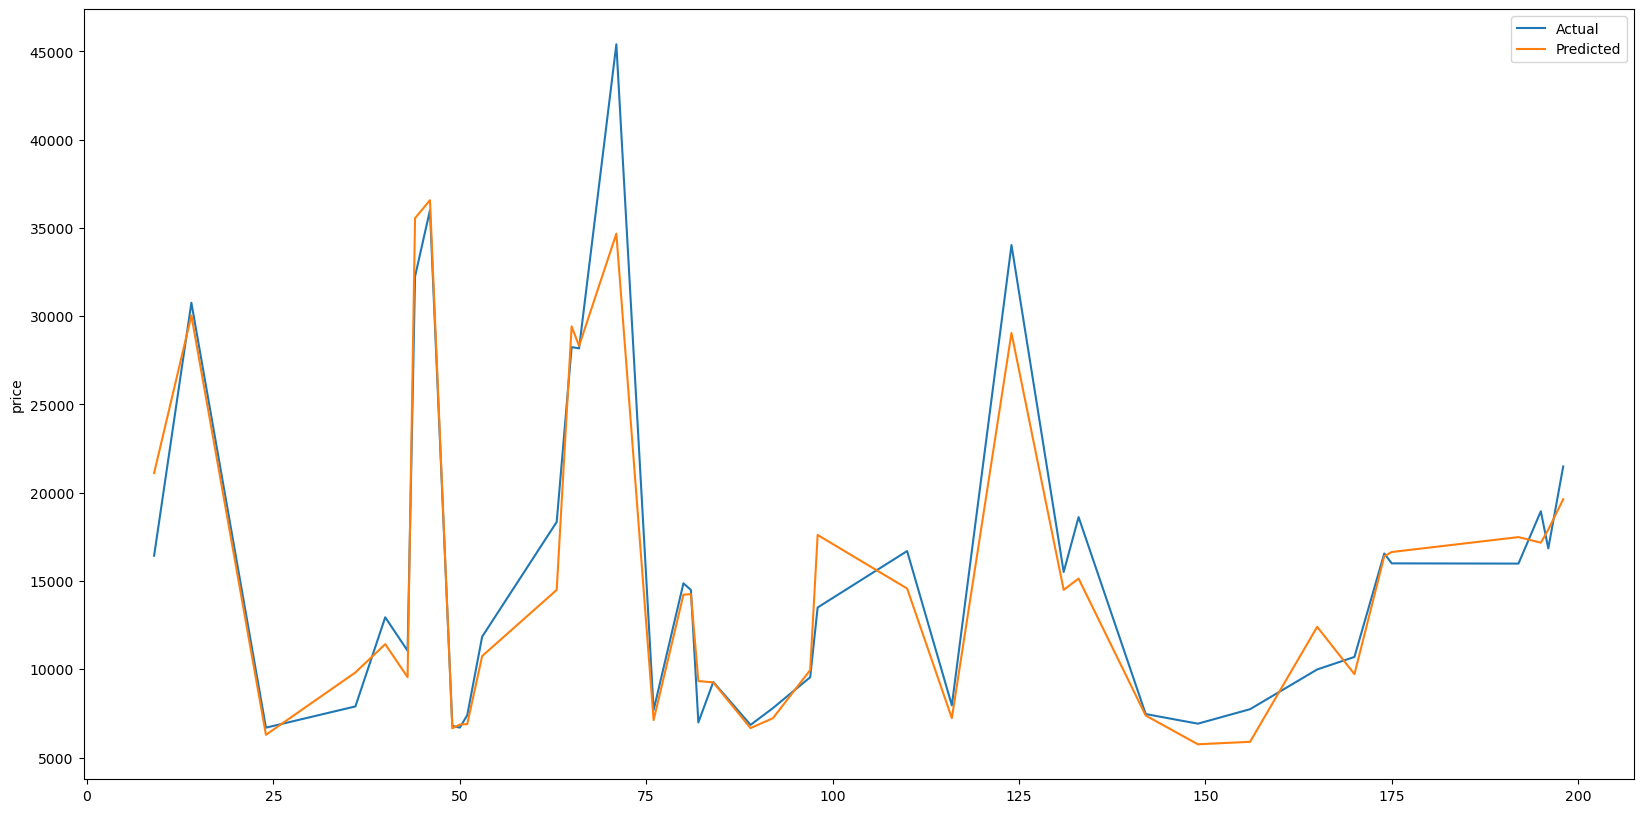

In [28]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [29]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f} - {abs(d / a * 100):5.2f}")

 34674  -   45400 - -10726 - 23.63
  6287  -    6692 -   -405 -  6.05
  6896  -    7395 -   -499 -  6.75
 16404  -   16558 -   -154 -  0.93
  9954  -    9549 -    405 -  4.25
 11422  -   12945 -  -1523 - 11.77
 29048  -   34028 -  -4980 - 14.64
  9256  -    9279 -    -23 -  0.25
  7380  -    7463 -    -83 -  1.11
 14498  -   15510 -  -1012 -  6.52


## Model with Standardization 

In [30]:
cars = pd.read_csv("final_cars.csv")

In [31]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [32]:
X = pd.get_dummies(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
## Scale X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_data = pd.DataFrame(X_train_scaled,columns = X.columns)

In [37]:
X_test_data = pd.DataFrame(X_test_scaled,columns = X.columns)

In [38]:
X_test_data.head()

,curb-weight,engine-size,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,2.413275,4.982797,-2.238975,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,-1.148408,1.148408,-0.197386,5.567764,-0.733799,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
1,-1.071322,-0.923353,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,4.358899,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
2,-1.150058,-0.895755,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
3,0.921319,1.312152,-1.054724,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,-1.148408,1.148408,-0.197386,-0.179605,1.362770,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
4,-0.439410,-0.095388,0.425590,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799


In [39]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test_scaled)

In [41]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6370358.01
Root Mean Squared Error : 2523.96
Mean Absolute Error : 1635.49
R2 Score: 0.93


### Micro model with 2 features 

In [42]:
# Micro model
X_micro =  X[['engine-size','highway-mpg']]
y_micro =  y

In [43]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [44]:
micro_model = LinearRegression()
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression()

In [45]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7796926906820936

In [46]:
y_micro_pred = micro_model.predict(X_micro_test)

In [47]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

mse = mean_squared_error(y_micro_test,y_micro_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

R2 Score: 0.79
Mean Squared Error : 15885068.97
Root Mean Squared Error : 3985.61


## RandomForestRegressor 

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [50]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9778806794981064


In [51]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [52]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6004929.468353659
RMSE :  2450.4957597093817


In [53]:
for f,v in sorted(zip (X_train.columns, model.feature_importances_),key = lambda t : t[1], reverse = True):
      print(f"{f:30} {v:0.5f}")

engine-size                    0.62077
curb-weight                    0.23163
highway-mpg                    0.09651
body-style_sedan               0.00758
make_bmw                       0.00710
make_audi                      0.00455
fuel-type_gas                  0.00351
make_volvo                     0.00335
fuel-type_diesel               0.00325
drive-wheels_fwd               0.00295
body-style_wagon               0.00276
make_peugot                    0.00179
body-style_hatchback           0.00154
make_volkswagen                0.00129
num-of-doors_four              0.00122
make_toyota                    0.00119
make_plymouth                  0.00100
make_mazda                     0.00096
drive-wheels_4wd               0.00092
drive-wheels_rwd               0.00089
make_porsche                   0.00085
make_nissan                    0.00080
body-style_convertible         0.00062
body-style_hardtop             0.00059
make_alfa-romero               0.00051
num-of-doors_two         

<Axes: ylabel='price'>

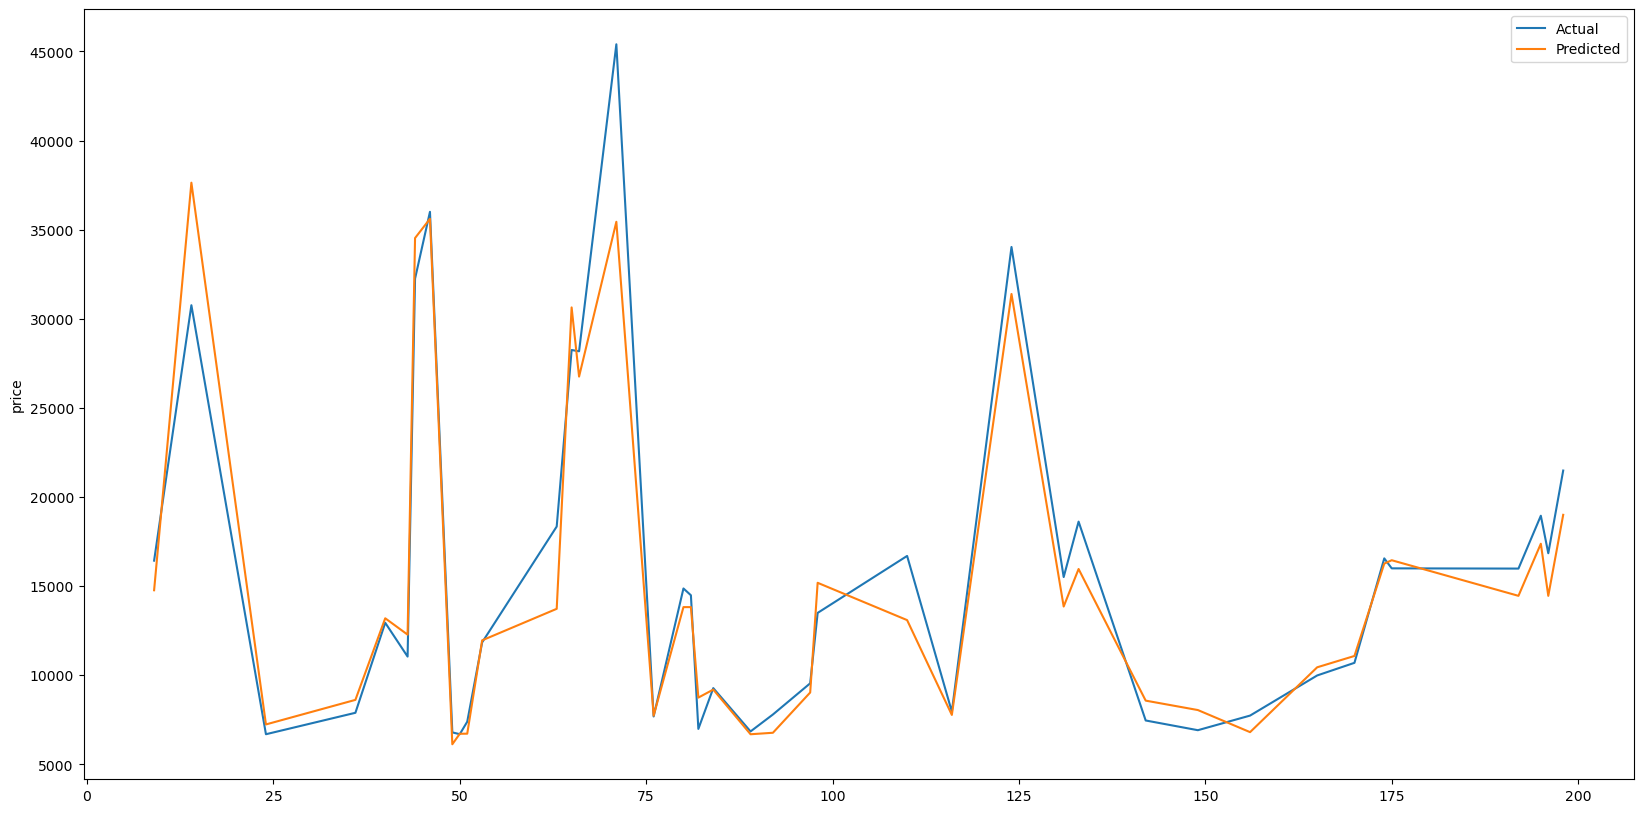

In [54]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [55]:
from sklearn.linear_model import SGDRegressor

In [56]:
X_mini = X[['curb-weight','engine-size','highway-mpg']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
model = SGDRegressor(max_iter=100)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')
print('No. of iterations = ', model.n_iter_)

Train score : 0.9345356814948992
No. of iterations =  88


In [61]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.92


In [62]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  4076249.0987020675
RMSE :  2018.9722877499007
